In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'
                     ,'number_project','time_spend_company'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 inter_bin_distance_penalty=0.0,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=range(2,21),
                 n_init_bins_list=[5,10,15,20,30])

In [4]:
from data_handler import DataHandler
from semantic_binning import SemanticBinning
handler = DataHandler(exp.data, exp.var_dict)

In [5]:
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=20, lr=0.001, weight_decay=0.0,
                     inter_bin_distance_penalty=0.01, verbose=True)

In [6]:
sb.fit(exp.data, n_init_bins=30)

>>> Epoch = 1, Loss = 0.6971947550773621
[27, 19, 22, 3, 4]
>>> Epoch = 2, Loss = 0.5406250953674316
[24, 16, 20, 3, 5]
>>> Epoch = 3, Loss = 0.40141671895980835
[24, 16, 22, 3, 5]
>>> Epoch = 4, Loss = 0.32795488834381104
[24, 9, 19, 3, 5]
>>> Epoch = 5, Loss = 0.2863802909851074
[25, 9, 20, 3, 3]
>>> Epoch = 6, Loss = 0.2619512677192688
[22, 9, 20, 3, 3]
>>> Epoch = 7, Loss = 0.24891361594200134
[20, 9, 15, 3, 3]
>>> Epoch = 8, Loss = 0.23745034635066986
[17, 9, 15, 3, 3]
>>> Epoch = 9, Loss = 0.22880905866622925
[18, 7, 11, 3, 2]
>>> Epoch = 10, Loss = 0.2230619639158249
[18, 7, 21, 3, 2]
>>> Epoch = 11, Loss = 0.21529504656791687
[19, 7, 19, 3, 2]
>>> Epoch = 12, Loss = 0.21069276332855225
[18, 7, 19, 3, 2]
>>> Epoch = 13, Loss = 0.20778320729732513
[18, 6, 17, 3, 3]
>>> Epoch = 14, Loss = 0.20431636273860931
[15, 20, 19, 2, 3]
>>> Epoch = 15, Loss = 0.20098258554935455
[16, 18, 18, 2, 3]
>>> Epoch = 16, Loss = 0.19782306253910065
[15, 16, 16, 2, 3]
>>> Epoch = 17, Loss = 0.1961375

In [7]:
sb.bins_by_var['satisfaction_level']['bins']

['(0.089, 0.1]',
 '(0.1, 0.21]',
 '(0.21, 0.37]',
 '(0.37, 0.4]',
 '(0.4, 0.43]',
 '(0.43, 0.45]',
 '(0.45, 0.52]',
 '(0.52, 0.57]',
 '(0.57, 0.59]',
 '(0.59, 0.62]',
 '(0.62, 0.7]',
 '(0.7, 0.74]',
 '(0.74, 0.81]',
 '(0.81, 0.85]',
 '(0.85, 0.9]',
 '(0.9, 0.95]',
 '(0.95, 1.0]']

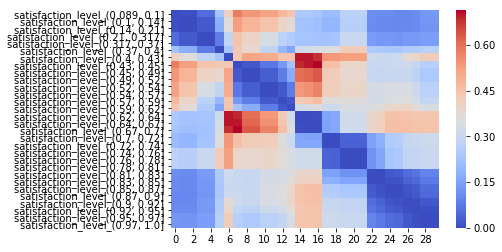

In [8]:
sb.plot_pairwise_distance_between_bins('satisfaction_level')

In [9]:
sb.bins_by_var['last_evaluation']['bins']

['(0.359, 0.48]',
 '(0.48, 0.49]',
 '(0.49, 0.51]',
 '(0.51, 0.52]',
 '(0.52, 0.54]',
 '(0.54, 0.61]',
 '(0.61, 0.63]',
 '(0.63, 0.7]',
 '(0.7, 0.74]',
 '(0.74, 0.82]',
 '(0.82, 0.84]',
 '(0.84, 0.88]',
 '(0.88, 1.0]']

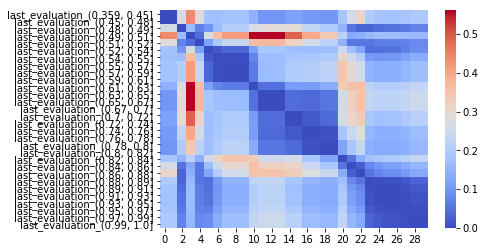

In [10]:
sb.plot_pairwise_distance_between_bins('last_evaluation')

In [11]:
sb.bins_by_var['average_montly_hours']['bins']

['(95.999, 133.0]',
 '(133.0, 142.0]',
 '(142.0, 154.0]',
 '(154.0, 162.0]',
 '(162.0, 168.0]',
 '(168.0, 181.0]',
 '(181.0, 200.0]',
 '(200.0, 207.0]',
 '(207.0, 232.0]',
 '(232.0, 238.0]',
 '(238.0, 247.0]',
 '(247.0, 253.0]',
 '(253.0, 257.0]',
 '(257.0, 262.0]',
 '(262.0, 267.0]',
 '(267.0, 310.0]']

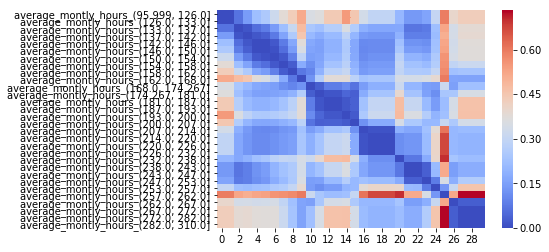

In [12]:
sb.plot_pairwise_distance_between_bins('average_montly_hours')

In [13]:
sb.bins_by_var['number_project']['bins']

['(1.999, 4.0]', '(4.0, 7.0]']

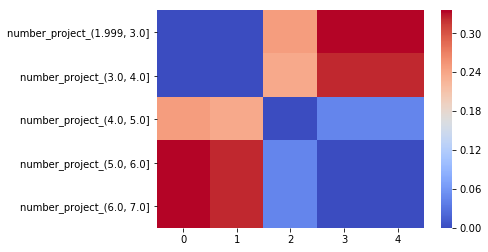

In [14]:
sb.plot_pairwise_distance_between_bins('number_project')

In [15]:
sb.bins_by_var['time_spend_company']['bins']

['(1.999, 3.0]', '(3.0, 6.0]', '(6.0, 10.0]']

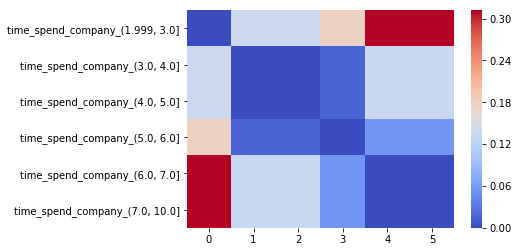

In [16]:
sb.plot_pairwise_distance_between_bins('time_spend_company')